In [182]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.patches as mpatches

pd.options.mode.chained_assignment = None
import datetime


In [183]:
data = pd.read_excel('DataFileAssignment.xls')
data = data[(data.Year < '2011-12-31')]
data.index=data['Year']
data.drop('Year', axis=1, inplace=True)
data.tail(5)

,Country,Total Pop,Pop Male,Pop Female,Transportation All,Transportation Male,Transportation Female,Falls All,Falls Male,Falls Female,...,Poison Female,Suicide All,Suicide Male,Suicide Female,Murdered All,Murdered Male,Murdered Female,Other All,Other Male,Other Female
Year,,,,,,,,,,,,,,,,,,,,,
2006-12-31,ZIMBABWE,13182000.0,6788730.0,6393270.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-31,ZIMBABWE,13380000.0,6890700.0,6489300.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-31,ZIMBABWE,13578000.0,6992670.0,6585330.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-31,ZIMBABWE,13776000.0,7094640.0,6681360.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-31,ZIMBABWE,13974000.0,7196610.0,6777390.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Trending by Type of Fatality

In [184]:
International = pd.DataFrame(columns=[])
International['Pop Male'] = data.groupby(['Year'])['Pop Male'].transform('max')
International['Pop Female'] = data.groupby(['Year'])['Pop Female'].transform('max')
International['Pop All'] = data.groupby(['Year'])['Total Pop'].transform('max')
International['Transportation Male'] = data.groupby(['Year'])['Transportation Male'].transform('sum')
International['Transportation Female'] = data.groupby(['Year'])['Transportation Female'].transform('sum')
International['Transportation All'] = data.groupby(['Year'])['Transportation All'].transform('sum')
International['Falls Male'] = data.groupby(['Year'])['Falls Male'].transform('sum')
International['Falls Female'] = data.groupby(['Year'])['Falls Female'].transform('sum')
International['Falls All'] = data.groupby(['Year'])['Falls All'].transform('sum')
International['Murdered Male'] = data.groupby(['Year'])['Murdered Male'].transform('sum')
International['Murdered Female'] = data.groupby(['Year'])['Murdered Female'].transform('sum')
International['Murdered All'] = data.groupby(['Year'])['Murdered All'].transform('sum')
International['Suicide Male'] = data.groupby(['Year'])['Suicide Male'].transform('sum')
International['Suicide Female'] = data.groupby(['Year'])['Suicide Female'].transform('sum')
International['Suicide All'] = data.groupby(['Year'])['Suicide All'].transform('sum')
International['Other Male'] = data.groupby(['Year'])['Other Male'].transform('sum')
International['Other Female'] = data.groupby(['Year'])['Other Female'].transform('sum')
International['Other All'] = data.groupby(['Year'])['Other All'].transform('sum')
International.head(2)

,Pop Male,Pop Female,Pop All,Transportation Male,Transportation Female,Transportation All,Falls Male,Falls Female,Falls All,Murdered Male,Murdered Female,Murdered All,Suicide Male,Suicide Female,Suicide All,Other Male,Other Female,Other All
Year,,,,,,,,,,,,,,,,,,
1985-12-31,126363300.0,114328700.0,240692000.0,183424.0,60651.0,244075.0,45436.0,43969.0,89405.0,88274.0,19667.0,107941.0,147386.0,50472.0,197858.0,164253.0,58406.0,222659.0
1986-12-31,127639680.0,115483520.0,243123200.0,189023.0,62944.0,251967.0,44302.0,45664.0,89966.0,91170.0,18653.0,109823.0,138023.0,51613.0,189636.0,173832.0,56751.0,230583.0


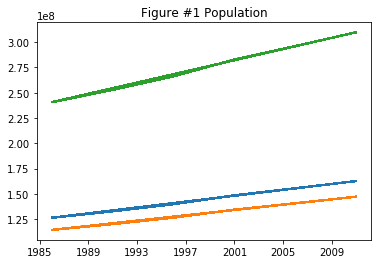

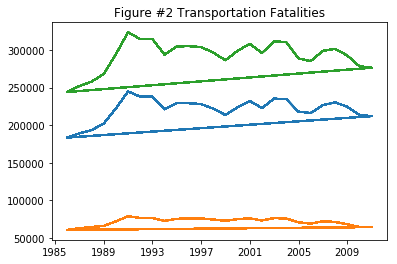

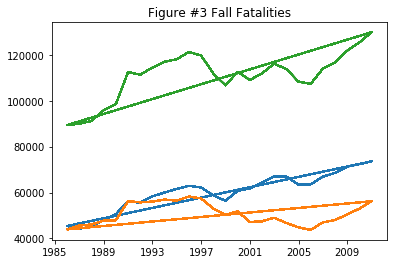

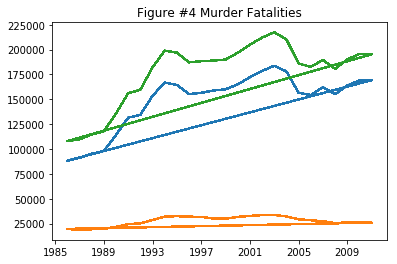

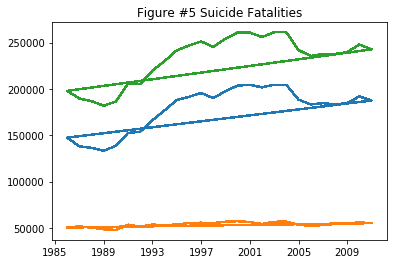

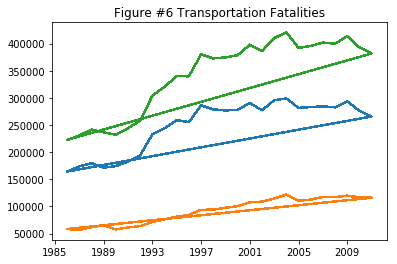

In [185]:
plt.title("Figure #1 Population")
plt.plot(International['Pop Male'])
plt.plot(International['Pop Female'])
plt.plot(International['Pop All'])
plt.show()
plt.title("Figure #2 Transportation Fatalities")
plt.plot(International['Transportation Male'])
plt.plot(International['Transportation Female'])
plt.plot(International['Transportation All'])
plt.show()
plt.title("Figure #3 Fall Fatalities")
plt.plot(International['Falls Male'])
plt.plot(International['Falls Female'])
plt.plot(International['Falls All'])
plt.show()
plt.title("Figure #4 Murder Fatalities")
plt.plot(International['Murdered Male'])
plt.plot(International['Murdered Female'])
plt.plot(International['Murdered All'])
plt.show()
plt.title("Figure #5 Suicide Fatalities")
plt.plot(International['Suicide Male'])
plt.plot(International['Suicide Female'])
plt.plot(International['Suicide All'])
plt.show()
plt.title("Figure #6 Transportation Fatalities")
plt.plot(International['Other Male'])
plt.plot(International['Other Female'])
plt.plot(International['Other All'])
plt.show()

# Fatality by Country

#### Creating a dataframe that Summarizes the data by Country 
#### population based on Calendar 2010 and the accidents are the sum 1985 to 2010

In [186]:

ByCountry = pd.DataFrame(columns=[])

ByCountry['Pop Male'] = data['Pop Male'].groupby([data['Country']]).max()
ByCountry['Pop Female'] = data['Pop Female'].groupby([data['Country']]).max()
ByCountry['Total Pop'] = data['Total Pop'].groupby([data['Country']]).max()

ByCountry['Transportation All'] = data['Transportation All'].groupby([data['Country']]).sum()
ByCountry ['Transportation All Percent']= ByCountry['Transportation All']/ByCountry['Total Pop']

ByCountry['Falls All'] = data['Falls All'].groupby([data['Country']]).sum()
ByCountry ['Falls All Percent']= ByCountry['Falls All']/ByCountry['Total Pop']

ByCountry['Poison All'] = data['Poison All'].groupby([data['Country']]).sum()
ByCountry ['Poison All Percent']= ByCountry['Poison All']/ByCountry['Total Pop']

ByCountry['Suicide All'] = data['Suicide All'].groupby([data['Country']]).sum()
ByCountry ['Suicide All Percent']= ByCountry['Suicide All']/ByCountry['Total Pop']

ByCountry['Murdered All'] = data['Murdered All'].groupby([data['Country']]).sum()
ByCountry ['Murdered All Percent']= ByCountry['Murdered All']/ByCountry['Total Pop']

ByCountry['Other All'] = data['Other All'].groupby([data['Country']]).sum()



ByCountry['Falls Male'] = data['Falls Male'].groupby([data['Country']]).sum()
ByCountry['Falls Male Percent']= ByCountry['Falls Male']/ByCountry['Pop Male']

ByCountry['Transportation Male'] = data['Transportation Male'].groupby([data['Country']]).sum()
ByCountry['Transportation Male Percent']= ByCountry['Transportation Male']/ByCountry['Pop Male']

ByCountry['Poison Male'] = data['Poison Male'].groupby([data['Country']]).sum()
ByCountry['Poison Male Percent']= ByCountry['Poison Male']/ByCountry['Pop Male']

ByCountry['Suicide Male'] = data['Suicide Male'].groupby([data['Country']]).sum()
ByCountry['Suicide Male Percent']= ByCountry['Suicide Male']/ByCountry['Pop Male']

ByCountry['Murdered Male'] = data['Murdered Male'].groupby([data['Country']]).sum()
ByCountry['Murdered Male Percent']= ByCountry['Murdered Male']/ByCountry['Pop Male']

ByCountry['Other Male'] = data['Other Male'].groupby([data['Country']]).sum()

ByCountry['Falls Female'] = data['Falls Female'].groupby([data['Country']]).sum()
ByCountry['Falls Female Percent']= ByCountry['Falls Female']/ByCountry['Pop Female']

ByCountry['Transportation Female'] = data['Transportation Female'].groupby([data['Country']]).sum()
ByCountry['Transportation Female Percent']= ByCountry['Transportation Female']/ByCountry['Pop Female']

ByCountry['Poison Female'] = data['Poison Female'].groupby([data['Country']]).sum()
ByCountry['Poison Female Percent']= ByCountry['Poison Female']/ByCountry['Pop Female']

ByCountry['Suicide Female'] = data['Suicide Female'].groupby([data['Country']]).sum()
ByCountry['Suicide Female Percent']= ByCountry['Suicide Female']/ByCountry['Pop Female']

ByCountry['Murdered Female'] = data['Murdered Female'].groupby([data['Country']]).sum()
ByCountry['Murdered Female Percent']= ByCountry['Murdered Female']/ByCountry['Pop Female']

ByCountry['Other Female'] = data['Other Female'].groupby([data['Country']]).sum()



## Deaths Via transportation

                          Transportation All Percent  Transportation All
Country                                                                 
UNITED STATES OF AMERICA                    0.003896           1207365.0
RUSSIAN FEDERATION                          0.006523            967369.0
BRAZIL                                      0.004251            844298.0
MEXICO                                      0.003291            390416.0
JAPAN                                       0.002572            327472.0


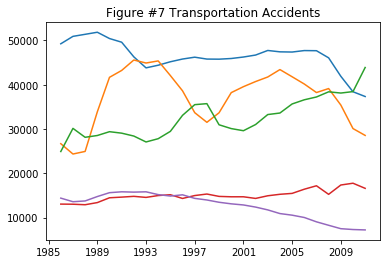

                          Transportation Female Percent  Transportation Female
Country                                                                       
UNITED STATES OF AMERICA                       0.002489               366401.0
RUSSIAN FEDERATION                             0.003524               245646.0
BRAZIL                                         0.001800               169780.0
JAPAN                                          0.001566                93718.0
MEXICO                                         0.001440                81133.0


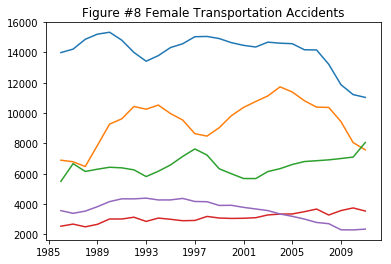

                          Transportation Male Percent  Transportation Male
Country                                                                   
UNITED STATES OF AMERICA                     0.005169             840964.0
RUSSIAN FEDERATION                           0.009183             721723.0
BRAZIL                                       0.006469             674518.0
MEXICO                                       0.004966             309283.0
JAPAN                                        0.003464             233754.0


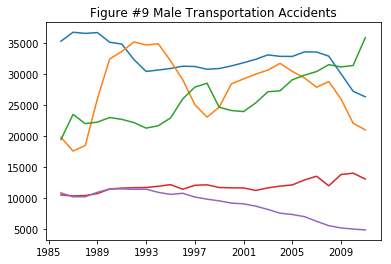

In [187]:
#by decending Overall Transportation deaths  from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['Transportation All'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['Transportation All Percent','Transportation All']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.title("Figure #7 Transportation Accidents")
plt.plot(b0['Transportation All'])
plt.plot(b1['Transportation All'])
plt.plot(b2['Transportation All'])
plt.plot(b3['Transportation All'])
plt.plot(b4['Transportation All'])
plt.show()

#by decending Female Transportation deaths from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['Transportation Female'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['Transportation Female Percent','Transportation Female']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.title("Figure #8 Female Transportation Accidents")
plt.plot(b0['Transportation Female'])
plt.plot(b1['Transportation Female'])
plt.plot(b2['Transportation Female'])
plt.plot(b4['Transportation Female'])
plt.plot(b3['Transportation Female'])

plt.show()

#by decending Male Transportation deaths from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['Transportation Male'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['Transportation Male Percent','Transportation Male']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.title("Figure #9 Male Transportation Accidents")
plt.plot(b0['Transportation Male'])
plt.plot(b1['Transportation Male'])
plt.plot(b2['Transportation Male'])
plt.plot(b3['Transportation Male'])
plt.plot(b4['Transportation Male'])
plt.show()


## Deaths By Murder


                          Murdered All Percent  Murdered All
Country                                                     
BRAZIL                                0.005086     1010132.0
RUSSIAN FEDERATION                    0.005359      794701.0
COLOMBIA                              0.012841      589636.0
UNITED STATES OF AMERICA              0.001697      525923.0
MEXICO                                0.003040      360588.0


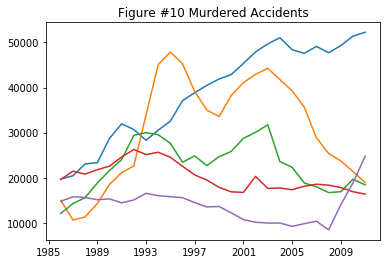

                          Murdered Female Percent  Murdered Female
Country                                                           
RUSSIAN FEDERATION                       0.002832         197402.0
UNITED STATES OF AMERICA                 0.000803         118246.0
BRAZIL                                   0.000893          84287.0
COLOMBIA                                 0.002081          44912.0
UKRAINE                                  0.001553          37505.0


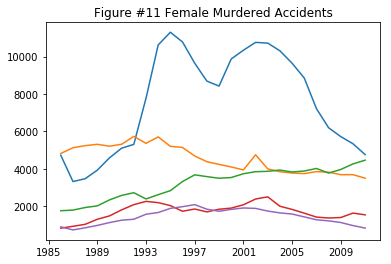

                          Murdered Male Percent  Murdered Male
Country                                                       
BRAZIL                                 0.008879       925845.0
RUSSIAN FEDERATION                     0.007600       597299.0
COLOMBIA                               0.022383       544724.0
UNITED STATES OF AMERICA               0.002506       407677.0
MEXICO                                 0.005190       323215.0


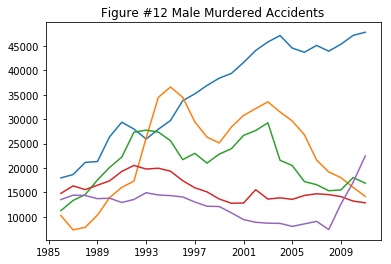

In [189]:
#by decending Overall Murdered deaths  from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['Murdered All'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['Murdered All Percent','Murdered All']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.title("Figure #10 Murdered Accidents")
plt.plot(b0['Murdered All'])
plt.plot(b1['Murdered All'])
plt.plot(b2['Murdered All'])
plt.plot(b3['Murdered All'])
plt.plot(b4['Murdered All'])
plt.show()

#by decending Female Murdered deaths from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['Murdered Female'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['Murdered Female Percent','Murdered Female']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.title("Figure #11 Female Murdered Accidents")
plt.plot(b0['Murdered Female'])
plt.plot(b1['Murdered Female'])
plt.plot(b2['Murdered Female'])
plt.plot(b3['Murdered Female'])
plt.plot(b4['Murdered Female'])
plt.show()

#by decending Male Murdered deaths from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['Murdered Male'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['Murdered Male Percent','Murdered Male']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.title("Figure #12 Male Murdered Accidents")
plt.plot(b0['Murdered Male'])
plt.plot(b1['Murdered Male'])
plt.plot(b2['Murdered Male'])
plt.plot(b3['Murdered Male'])
plt.plot(b4['Murdered Male'])
plt.show()



## Deaths By Suicide


                          Suicide All Percent  Suicide All
Country                                                   
RUSSIAN FEDERATION                   0.008235    1221265.0
UNITED STATES OF AMERICA             0.002666     826137.0
JAPAN                                0.005365     683135.0
UKRAINE                              0.006000     308207.0
FRANCE                               0.004614     290495.0


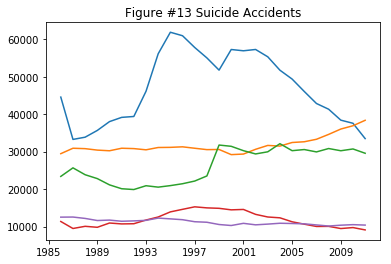

                          Suicide Female Percent  Suicide Female
Country                                                         
RUSSIAN FEDERATION                      0.003228        224959.0
JAPAN                                   0.003557        212875.0
UNITED STATES OF AMERICA                0.001138        167551.0
FRANCE                                  0.002668         79789.0
GERMANY                                 0.001733         66690.0


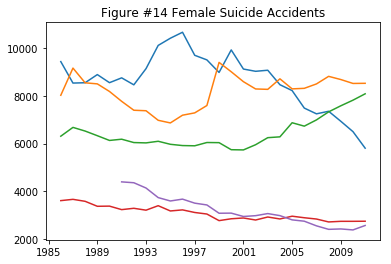

                          Suicide Male Percent  Suicide Male
Country                                                     
RUSSIAN FEDERATION                    0.012676      996306.0
UNITED STATES OF AMERICA              0.004048      658586.0
JAPAN                                 0.006969      470260.0
UKRAINE                               0.009109      248016.0
FRANCE                                0.006374      210706.0


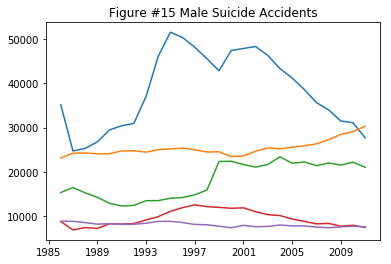

In [176]:
#by decending Overall Suicide deaths  from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['Suicide All'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['Suicide All Percent','Suicide All']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.title("Figure #13 Suicide Accidents")
plt.plot(b0['Suicide All'])
plt.plot(b1['Suicide All'])
plt.plot(b2['Suicide All'])
plt.plot(b3['Suicide All'])
plt.plot(b4['Suicide All'])
plt.show()

#by decending Female Suicide deaths from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['Suicide Female'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['Suicide Female Percent','Suicide Female']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.title("Figure #14 Female Suicide Accidents")
plt.plot(b0['Suicide Female'])
plt.plot(b1['Suicide Female'])
plt.plot(b2['Suicide Female'])
plt.plot(b3['Suicide Female'])
plt.plot(b4['Suicide Female'])
plt.show()

#by decending Male Suicide deaths from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['Suicide Male'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['Suicide Male Percent','Suicide Male']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.title("Figure #15 Male Suicide Accidents")
plt.plot(b0['Suicide Male'])
plt.plot(b1['Suicide Male'])
plt.plot(b2['Suicide Male'])
plt.plot(b3['Suicide Male'])
plt.plot(b4['Suicide Male'])
plt.show()



## Deaths By Poison


                          Poison All Percent  Poison All
Country                                                 
RUSSIAN FEDERATION                  0.008149   1208436.0
UNITED STATES OF AMERICA            0.001226    380007.0
UKRAINE                             0.005993    307841.0
KAZAKHSTAN                          0.004953     81872.0
BELARUS                             0.005470     55971.0


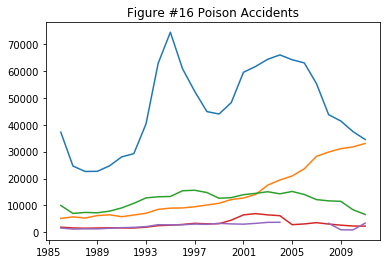

                          Poison Female Percent  Poison Female
Country                                                       
RUSSIAN FEDERATION                     0.003976       277097.0
UNITED STATES OF AMERICA               0.000804       118321.0
UKRAINE                                0.002763        66716.0
KAZAKHSTAN                             0.002374        20799.0
BELARUS                                0.002544        12236.0


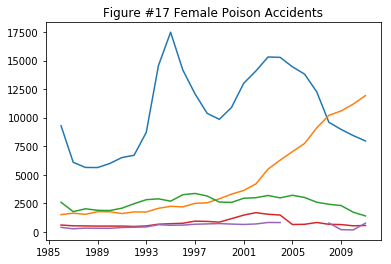

                          Poison Male Percent  Poison Male
Country                                                   
RUSSIAN FEDERATION                   0.011850     931339.0
UNITED STATES OF AMERICA             0.001609     261686.0
UKRAINE                              0.008856     241125.0
KAZAKHSTAN                           0.007861      61073.0
BELARUS                              0.008065      43735.0


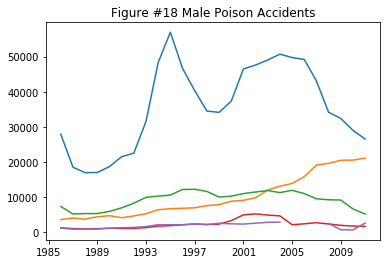

In [177]:
#by decending Overall Poison deaths  from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['Poison All'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['Poison All Percent','Poison All']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.title("Figure #16 Poison Accidents")
plt.plot(b0['Poison All'])
plt.plot(b1['Poison All'])
plt.plot(b2['Poison All'])
plt.plot(b3['Poison All'])
plt.plot(b4['Poison All'])
plt.show()

#by decending Female Poison deaths from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['Poison Female'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['Poison Female Percent','Poison Female']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.title("Figure #17 Female Poison Accidents")
plt.plot(b0['Poison Female'])
plt.plot(b1['Poison Female'])
plt.plot(b2['Poison Female'])
plt.plot(b3['Poison Female'])
plt.plot(b4['Poison Female'])
plt.show()

#by decending Male Poison deaths from 1985 to 2010

ByCountry = ByCountry.sort_values(by=['Poison Male'], ascending=False)
a = ByCountry.head(5)
a['Country'] = a.index
print(a[['Poison Male Percent','Poison Male']])
a = a['Country']
b0 = data.loc[data['Country'].isin(a[0:1,])]
b1 = data.loc[data['Country'].isin(a[1:2,])]
b2 = data.loc[data['Country'].isin(a[2:3,])]
b3 = data.loc[data['Country'].isin(a[3:4,])]
b4 = data.loc[data['Country'].isin(a[4:5,])]
plt.title("Figure #18 Male Poison Accidents")
plt.plot(b0['Poison Male'])
plt.plot(b1['Poison Male'])
plt.plot(b2['Poison Male'])
plt.plot(b3['Poison Male'])
plt.plot(b4['Poison Male'])
plt.show()

